<a href="https://colab.research.google.com/github/Yewon9/STT/blob/main/EDA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pydub

In [25]:
import pandas as pd
from pydub import AudioSegment
from tqdm import tqdm
import matplotlib.pyplot as plt
import librosa
import numpy as np
import seaborn as sns
import re

# 일반 음성 데이터

In [4]:
general = pd.read_csv('general.csv')

In [5]:
general

,Path,Text
0,/content/drive/MyDrive/project/data_aihub/4/5e...,편하게 좋은 곳으로 갔겠지? 응. 힘을 내야되는데 어떡하지.
1,/content/drive/MyDrive/project/data_aihub/5_2/...,내가 받은 선물이 궁금한거야? 보고싶어? 그래. 나중에 보여줄게.
2,/content/drive/MyDrive/project/data_aihub/4/5e...,아직 말씀 안 드렸어. 어떡하지.
3,/content/drive/MyDrive/project/data_aihub/5/5e...,오늘도 털어놓았더니 마음이 한결 가벼워졌어. 다음에도 또 부탁해.
4,/content/drive/MyDrive/project/data_aihub/5_2/...,그건 나도 몰라.
...,...,...
11995,/content/drive/MyDrive/project/data_aihub/4/5e...,3년 전에 동호회 갔었는데 거기서 처음 만났지.
11996,/content/drive/MyDrive/project/data_aihub/4/5e...,깜짝 놀랬다니까.
11997,/content/drive/MyDrive/project/data_aihub/5_2/...,실망스러운건 사과를 억지로 했다는 거야. 상처받았지.
11998,/content/drive/MyDrive/project/data_aihub/5/5e...,합격자 명단에 이름이 또 없는 거 있지?


## 데이터 개수 확인

In [6]:
print(general.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Path    12000 non-null  object
 1   Text    12000 non-null  object
dtypes: object(2)
memory usage: 187.6+ KB
None


In [7]:
print(general.describe())

                                                     Path  \
count                                               12000   
unique                                              12000   
top     /content/drive/MyDrive/project/data_aihub/4/5e...   
freq                                                    1   

                                     Text  
count                               12000  
unique                              12000  
top     편하게 좋은 곳으로 갔겠지? 응. 힘을 내야되는데 어떡하지.  
freq                                    1  


In [8]:
missing_text = general[general['Text'] == '']
print(f"빈 텍스트 개수: {len(missing_text)}")

빈 텍스트 개수: 0


In [9]:
duplicate_texts = general['Text'].duplicated().sum()
print(f"중복된 텍스트 개수: {duplicate_texts}")

중복된 텍스트 개수: 0


## 음성 파일 길이 분석

In [10]:
def get_audio_length(path):
  audio = AudioSegment.from_wav(path)
  return len(audio) / 1000

In [11]:
general['Audio_Length'] = [get_audio_length(path) for path in tqdm(general['Path'])]

100%|██████████| 12000/12000 [1:11:27<00:00,  2.80it/s]


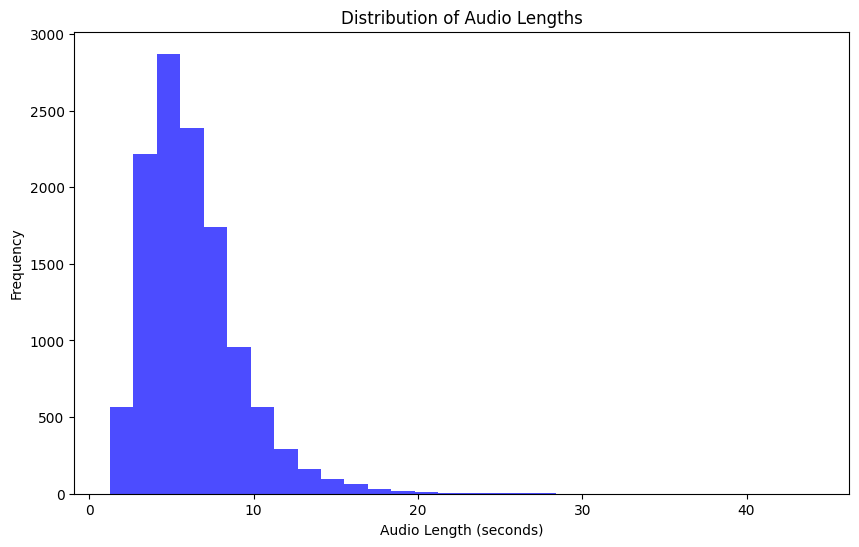

In [12]:
plt.figure(figsize = (10, 6))
plt.hist(general['Audio_Length'], bins = 30, color = 'blue', alpha = 0.7)
plt.title('Distribution of Audio Lengths')
plt.xlabel('Audio Length (seconds)')
plt.ylabel('Frequency')
plt.show()

## 텍스트 분석

### 불필요한 기호 제거

In [19]:
def clean_text(text):
    cleaned_text = re.sub(r'[+u/I*]', '', text)
    return cleaned_text

In [20]:
general['Cleaned_Text'] = general['Text'].apply(clean_text)

In [21]:
print(general[['Text', 'Cleaned_Text']].head())

                                   Text                          Cleaned_Text
0     편하게 좋은 곳으로 갔겠지? 응. 힘을 내야되는데 어떡하지.     편하게 좋은 곳으로 갔겠지? 응. 힘을 내야되는데 어떡하지.
1  내가 받은 선물이 궁금한거야? 보고싶어? 그래. 나중에 보여줄게.  내가 받은 선물이 궁금한거야? 보고싶어? 그래. 나중에 보여줄게.
2                    아직 말씀 안 드렸어. 어떡하지.                    아직 말씀 안 드렸어. 어떡하지.
3  오늘도 털어놓았더니 마음이 한결 가벼워졌어. 다음에도 또 부탁해.  오늘도 털어놓았더니 마음이 한결 가벼워졌어. 다음에도 또 부탁해.
4                             그건 나도 몰라.                             그건 나도 몰라.


### 텍스트 길이 분석

In [13]:
general['Text_Length'] = general['Text'].apply(len)

In [14]:
print(general[['Text', 'Text_Length']].head())

                                   Text  Text_Length
0     편하게 좋은 곳으로 갔겠지? 응. 힘을 내야되는데 어떡하지.           33
1  내가 받은 선물이 궁금한거야? 보고싶어? 그래. 나중에 보여줄게.           36
2                    아직 말씀 안 드렸어. 어떡하지.           18
3  오늘도 털어놓았더니 마음이 한결 가벼워졌어. 다음에도 또 부탁해.           36
4                             그건 나도 몰라.            9


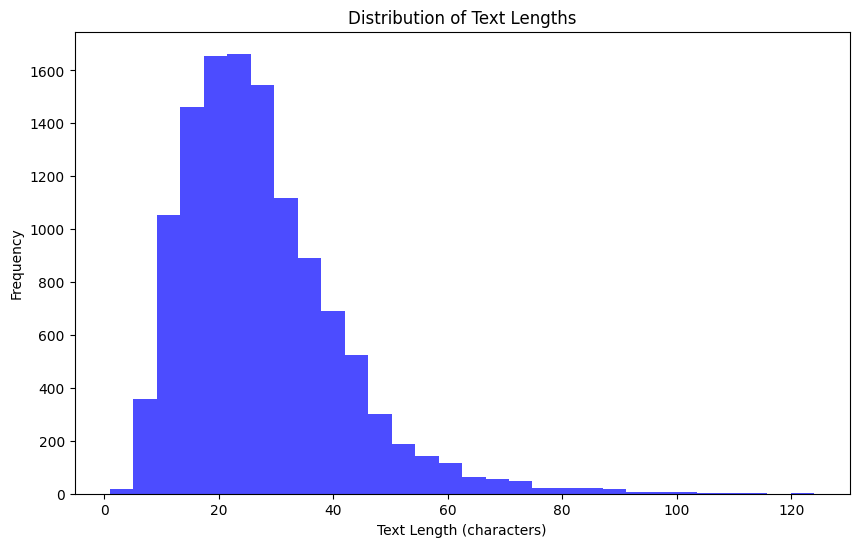

In [15]:
plt.figure(figsize = (10, 6))
plt.hist(general['Text_Length'], bins = 30, color = 'blue', alpha = 0.7)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')
plt.show()

### 빈 텍스트 확인

In [16]:
empty_texts = general[general['Text_Length'] == 0]
print(f"빈 텍스트 개수: {len(empty_texts)}")

빈 텍스트 개수: 0


### 중복된 텍스트 확인

In [17]:
duplicate_texts = general[general['Text'].duplicated()]
print(f"중복된 텍스트 개수: {len(duplicate_texts)}")

중복된 텍스트 개수: 0


In [28]:
general

,Path,Text,Audio_Length,Text_Length,Cleaned_Text,SNR
0,/content/drive/MyDrive/project/data_aihub/4/5e...,편하게 좋은 곳으로 갔겠지? 응. 힘을 내야되는데 어떡하지.,9.259,33,편하게 좋은 곳으로 갔겠지? 응. 힘을 내야되는데 어떡하지.,0.000000e+00
1,/content/drive/MyDrive/project/data_aihub/5_2/...,내가 받은 선물이 궁금한거야? 보고싶어? 그래. 나중에 보여줄게.,8.661,36,내가 받은 선물이 궁금한거야? 보고싶어? 그래. 나중에 보여줄게.,2.288259e-04
2,/content/drive/MyDrive/project/data_aihub/4/5e...,아직 말씀 안 드렸어. 어떡하지.,5.547,18,아직 말씀 안 드렸어. 어떡하지.,5.572141e-02
3,/content/drive/MyDrive/project/data_aihub/5/5e...,오늘도 털어놓았더니 마음이 한결 가벼워졌어. 다음에도 또 부탁해.,8.277,36,오늘도 털어놓았더니 마음이 한결 가벼워졌어. 다음에도 또 부탁해.,5.177193e-07
4,/content/drive/MyDrive/project/data_aihub/5_2/...,그건 나도 몰라.,2.347,9,그건 나도 몰라.,0.000000e+00
...,...,...,...,...,...,...
11995,/content/drive/MyDrive/project/data_aihub/4/5e...,3년 전에 동호회 갔었는데 거기서 처음 만났지.,6.955,26,3년 전에 동호회 갔었는데 거기서 처음 만났지.,1.514065e-03
11996,/content/drive/MyDrive/project/data_aihub/4/5e...,깜짝 놀랬다니까.,4.053,9,깜짝 놀랬다니까.,1.553158e-06
11997,/content/drive/MyDrive/project/data_aihub/5_2/...,실망스러운건 사과를 억지로 했다는 거야. 상처받았지.,5.419,29,실망스러운건 사과를 억지로 했다는 거야. 상처받았지.,0.000000e+00
11998,/content/drive/MyDrive/project/data_aihub/5/5e...,합격자 명단에 이름이 또 없는 거 있지?,4.523,22,합격자 명단에 이름이 또 없는 거 있지?,5.177193e-07


In [ ]:
general.to_csv('general_eda.csv', index = False, encoding = 'utf-8-sig')